In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

In [2]:
# Take a look at the data in df1

df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [13]:
# Does x increase from time one to time two?

df1.groupby('time').x.agg(['mean', 'median', 'var', 'std'])

# The mean and median of x increase from time one to time two

,mean,median,var,std
time,,,,
one,5.726669,5.266279,3.843857,1.960576
two,7.296448,7.891303,4.471026,2.114480


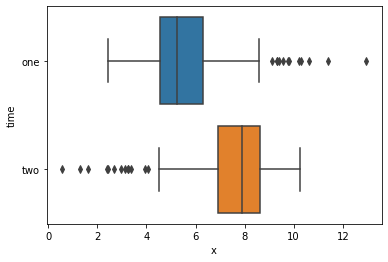

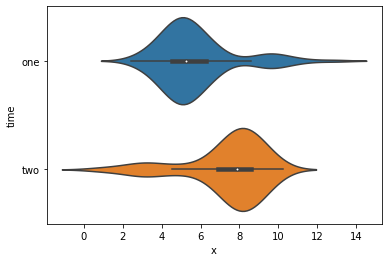

In [10]:
# Visualize the relationship between x and time

# x = df1.x
# y = df1.time

sns.boxplot(data=df1, x='x', y='time')
plt.show()
sns.violinplot(data=df1, x='x', y='time')

In [14]:
# Run a statistical test to further examine the relationship between these features. 
# H0: There is no sigfinicant difference in x between time one and time two.
# Ha: There is a sigfinicant difference in x between time one and time two.

mask_one = (df1.time == 'one')
mask_two = (df1.time == 'two')

df1_one = df1[mask_one]
df1_two = df1[mask_two]

x1 = df1_one.x
x2 = df1_two.x

t, p = stats.ttest_ind(x1, x2)
t, p

# since p < 0.05, H0 is rejected. 

(-5.443902721870272, 1.5320971681720527e-07)

In [15]:
# Take a olli at the data in df2

df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


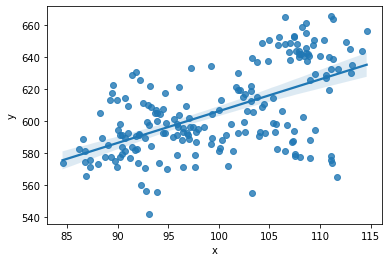

In [18]:
# Visualize the relationship between x and y

sns.regplot(data=df2, x='x', y='y')

In [19]:
# How would you describe the relationship between x and y? 

# x and y are correlated in a positive way, with a medium strength

In [20]:
# Run a statistical test to examine the relationship between x and y
# H0: There is not a linear correlatin between x and y.
# Ha: There is a linear correlatin between x and y.

t, p = stats.pearsonr(df2.x, df2.y)
t, p

# since p < 0.05, H0 is rejected. 

(0.5693902765694359, 1.3960403186191819e-18)

In [21]:
# Take a look at the data in df3.

df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surgeon  1000 non-null   object
 1   surgery  1000 non-null   object
 2   success  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [23]:
# Which surgeon has the higher success rate?

df3.surgeon.value_counts()

# surgeon A has 480 surgeries done.
# surgeon B has 520 surgeries done.

B    520
A    480
Name: surgeon, dtype: int64

In [24]:
df3.groupby('surgeon').success.sum()

# surgeon A has 421 successful surgeries
# surgeon A has 376 successful surgeries
# Apparently, surgeon A has the higher success rate. 

surgeon
A    421
B    376
Name: success, dtype: int64

In [27]:
# if you had to have heart bypass surgery, which surgen should you go with?

mask_bypass = (df3.surgery == 'heart bypass')
df3_bypass = df3[mask_bypass]
df3_bypass.head()

,surgeon,surgery,success
2,A,heart bypass,0
4,A,heart bypass,1
7,B,heart bypass,1
8,B,heart bypass,1
12,A,heart bypass,1


In [28]:
df3_bypass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 2 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surgeon  517 non-null    object
 1   surgery  517 non-null    object
 2   success  517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.2+ KB


In [29]:
df3_bypass.surgeon.value_counts()

B    418
A     99
Name: surgeon, dtype: int64

In [32]:
df3_bypass.groupby('surgeon').success.sum()

surgeon
A     65
B    281
Name: success, dtype: int64

In [33]:
bypass_suc_a = 65/99
bypass_suc_b = 281/418

bypass_suc_a, bypass_suc_b

# I will chose surgeon B since surgeon B has a slightly higher success rate and more experience. 

(0.6565656565656566, 0.6722488038277512)

In [ ]:
# For df1 and df2, what happens to the relationships if you take into account the group feature?

